# Melbourne House Market Regression and Classification Modelling

This Data Anaytics Assignment provides a brief understanding of Melbourne Hourse Market.** **Wooliter Chen** **


#Linear Regression
#Logistic Regression
#Multi-Class Classification
#Nearest Neighbours Classification

In [ ]:
import numpy as np 
import pandas as pd 
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('../input/melbourne-housing-snapshot/melb_data.csv')
data['Date']=pd.to_datetime(data['Date']) ## convert 'object' to 'Date' Data type
Melbourne_df=data.copy()

# A quick overview of data

In [ ]:
data.head()

In [ ]:
Melbourne_df.describe()

In [ ]:
print(Melbourne_df.info())

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(Melbourne_df.Price/1000,bins=50)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

As we can see from the price distribution above, which reflects the probability theory “normal distribution. The 68% of House Price allocated in 1 standard deviation
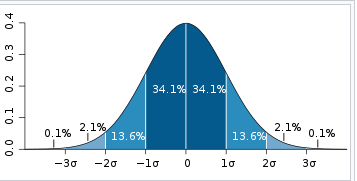

Re-Name data for 'Type' columns

In [ ]:
Re_Name={'h':'House','u':'Unit','t':'Townhouse'}
Melbourne_df.replace({'Type':Re_Name},inplace=True)

# Top 5 Most Expensive Suburbs

In [ ]:
Most_Expensive_Suburb=Melbourne_df.groupby(['Suburb'])['Price'].mean().sort_values(ascending=True).head(5)
Most_Expensive_Suburb=Most_Expensive_Suburb/1000
Most_Expensive_Suburb.plot.barh()
plt.xlabel('Prices in $1000')
plt.title('Top 5 Most Expensive Suburbs')

# Price VS Type

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x=Melbourne_df['Type'],y=Melbourne_df['Price']).set_title('Price VS Type')

# Distance between Property to Downtown

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(y=np.log(Melbourne_df['Price']),x=Melbourne_df['Distance'],data=Melbourne_df,hue='Type').set_title("Distance from Property to Downtown",fontsize=20)


# Price Features VS Distance VS Type

In [ ]:
def Zone(Distance):
    if Distance<5:
        return '<5KM'
    elif Distance<=5 and Distance<12:
        return '5KM-12KM'
    elif Distance <=12 and Distance<23:
        return '12KM-23KM'
    else:
        return '>23KM'
Melbourne_df['Zone']=Melbourne_df['Distance'].apply(Zone)

Melbourne_Zone1=Melbourne_df[Melbourne_df.Zone=='<5KM']
Melbourne_Zone2=Melbourne_df[Melbourne_df.Zone=='5KM-12KM']
Melbourne_Zone3=Melbourne_df[Melbourne_df.Zone=='12KM-23KM']
Melbourne_Zone4=Melbourne_df[Melbourne_df.Zone=='>23KM']

fig, axarr = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Price in $1000',fontsize=15)
sns.boxenplot(x=Melbourne_Zone1.Zone,y=Melbourne_Zone1['Price']/1000,data=Melbourne_Zone1,palette="Set1",ax=axarr[0][0],hue='Type')
sns.boxenplot(x=Melbourne_Zone2.Zone,y=Melbourne_Zone2['Price']/1000,data=Melbourne_Zone2,palette="Set1",ax=axarr[0][1],hue='Type')
sns.boxenplot(x=Melbourne_Zone3.Zone,y=Melbourne_Zone3['Price']/1000,data=Melbourne_Zone3,palette="Set1",ax=axarr[1][0],hue='Type')
sns.boxenplot(x=Melbourne_Zone4.Zone,y=Melbourne_Zone4['Price']/1000,data=Melbourne_Zone4,palette="Set1",ax=axarr[1][1],hue='Type')
plt.subplots_adjust(hspace=.4)
sns.set_style('darkgrid')
sns.despine()

# Price Over the Period

In [ ]:
plt.figure(figsize=(16,10))
sns.lineplot(x='Date',y='Price',data=Melbourne_df,hue='Type',palette='Set2').set_ylim(500000,2200000)



# Identify Missing Data

In [ ]:
Missing_Data=Melbourne_df.isnull().sum()
Missing_df=DataFrame(Missing_Data.sort_values(ascending=False))
Missing_df.columns=['Total Missing Data']
Missing_df=Missing_df.head(5)
print(Missing_df)

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Missing Data',fontsize=15)
sns.barplot(x=Missing_df.index,y='Total Missing Data',data=Missing_df)

# Drop top 2 missing data + remove null value

In [ ]:
Melbourne_df=Melbourne_df.drop(['BuildingArea','YearBuilt'],'columns')
Melbourne_df=Melbourne_df.dropna()
print(Melbourne_df.info())

# Identify Numerical Attributes

In [ ]:
Numerical_Attributes=[Attribute for Attribute in Melbourne_df.columns if Melbourne_df[Attribute].dtype !='object']
print('There are {} numerical features.'.format(len(Numerical_Attributes)))

# Linear Regression Modelling

In [ ]:
from sklearn.linear_model import LinearRegression

# Drop Categorical Columns + Geographic Coordinate

In [ ]:
Category_Features=['Suburb','Address','Type','Method','SellerG','Postcode','CouncilArea','Regionname','Date','Lattitude','Longtitude','Zone','Propertycount']

Melbourne_df_CategoryOut=Melbourne_df.drop(Category_Features,'columns')
Property_Classification=Melbourne_df_CategoryOut# Prepare Logistic Modelling DataFrame for later use
print(Melbourne_df_CategoryOut.info())

# Continuous Attributes correlations

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Correlation heatmap of continuous Attributes',fontsize=15)
sns.heatmap(Melbourne_df_CategoryOut.corr(),annot=True,fmt='.2f',cmap='RdYlGn')

# Linear Regression, 'Price' is Target

In [ ]:
Linear_Regression=LinearRegression()
Melbourne_df_PriceOut=Melbourne_df_CategoryOut.drop('Price','columns')#set 'Price' as the target, we have to drop 'Price' column for Linear Regression fit
X_multi=Melbourne_df_PriceOut
Y_target=Melbourne_df.Price
Linear_Regression.fit(X_multi,Y_target)
print('The estimated intercept coefficient is {:.2f}'.format(Linear_Regression.intercept_)) #2 Digital Decimal Points
print('The number of coefficients used was %d'%(len(Linear_Regression.coef_)))

# Looking for the greatest Coefficient for training data to predict Price

In [ ]:
coeff_df=DataFrame(Melbourne_df_PriceOut.columns)
coeff_df.columns=['Features']
coeff_df['Coefficient Estimate']=pd.Series(Linear_Regression.coef_)
print(coeff_df)

# Have a quick look for the relationship between 'Rooms' and Price since 'Rooms' has the largest Coefficient


In [ ]:
plt.figure(figsize=(16,16))
sns.jointplot(x='Rooms',y='Price',data=Melbourne_df_CategoryOut,kind='reg',truncate=False,color='m')

# Data Training

In [ ]:
import sklearn.model_selection

X=Melbourne_df.Rooms
X=np.array([[value,1]for value in X])
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,Y_target)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

# Identify Mean Square Error

In [ ]:
Linear_Regression.fit(X_train,Y_train)
Prediction_train=Linear_Regression.predict(X_train)
Prediction_test=Linear_Regression.predict(X_test)
print('Fit a model X_train, and calculate the Mean Square Error with Y_target: {}'.format(np.mean(Y_train-Prediction_train)**2))
print('Fit a model X_train, and calculate the Mean Square Error with X_test and Y_test: {}'.format(np.mean(Y_test-Prediction_test)**2))

# Produce Residual Plot

In [ ]:
Train=plt.scatter(Prediction_train,(Prediction_train-Y_train),color='b',alpha=0.5)
Test=plt.scatter(Prediction_test,(Prediction_test-Y_test),color='r',alpha=0.5)
plt.hlines(y=0,xmin=-10,xmax=40)
plt.legend((Train,Test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import math

# What Logictis Model looks like !

In [ ]:
def logistic(t):
    return 1.0/(1+math.exp((-1.0)*t))
t=np.linspace(-6,6,500)
y=np.array([logistic(ele)for ele in t])
plt.plot(t,y)
plt.title('Logistic Function')

# Identify if property owns a vehicle

In [ ]:
#Check if a property has vehicles
def Vehicle_Check(x):
    if x !=0:
        return 1
    else:
        return 0
    
Melbourne_df_CategoryOut['Have_Vehicle']=Melbourne_df['Car'].apply(Vehicle_Check)
Y_Target=Melbourne_df_CategoryOut.Have_Vehicle

# Create Dummy Variable for 'Type' column

In [ ]:
Type_Dummies=pd.get_dummies(Melbourne_df.Type)
Suburb_Dummies=pd.get_dummies(Melbourne_df.Suburb)
Dummies=pd.concat([Type_Dummies,Suburb_Dummies],axis=1)
Melbourne_df_Logistic=Melbourne_df_CategoryOut.drop(['Have_Vehicle','Car'],'columns')# Drop Target Columns
Melbourne_df_Logistic=pd.concat([Melbourne_df_Logistic,Dummies],axis=1) # merge Dummy variable

# Dropping one column of each dummy variable set to avoid multicollinearity

In [ ]:
Melbourne_df_Logistic=Melbourne_df_Logistic.drop(['Abbotsford','Unit'],axis=1)
X=Melbourne_df_Logistic
Y_Target=np.ravel(Y_Target)
Logistic_model=LogisticRegression() 
Logistic_model.fit(X,Y_Target)
print("Accuracy rate: {:.3f}".format(Logistic_model.score(X,Y_Target)))
Coefficients_df=DataFrame(zip(X.columns,np.transpose(Logistic_model.coef_)))

# Testing and Training Data Sets

In [ ]:
X_Train,X_Test,Y_Train,Y_Test=sklearn.model_selection.train_test_split(X,Y_Target)
Logistic_model2=LogisticRegression()
Logistic_model2.fit(X_Train,Y_Train)

#Predict the classes of the testing data set
Class_Prediction=Logistic_model2.predict(X_Test)
print("Accuracy Score: {:.3f}".format(metrics.accuracy_score(Y_Test,Class_Prediction)))

# Multi-Class Classification

In [ ]:
# Classify property Type
# A quick look for the relationship between different attributess
from sklearn.model_selection import train_test_split
Property_Classification=Property_Classification.drop('Have_Vehicle',1)
sns.pairplot(Property_Classification,height=2)

In [ ]:
#Drop 'Landsize' column since this attribute did not tell information from pairplot
Property_Classification=Property_Classification.drop('Landsize',axis=1)
Y_Target=Melbourne_df.Type
X=Property_Classification
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y_Target,test_size=0.4,random_state=3)
Logistic_model.fit(X_Train,Y_Train)
Y_Prediction=Logistic_model.predict(X_Test)

print("Accuracy Score: {:.3f}".format(metrics.accuracy_score(Y_Test,Y_Prediction)))

# Nearest Neighbours Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier(n_neighbors=6)
KNN.fit(X_Train,Y_Train)
Y_Prediction=KNN.predict(X_Test)
print("Accuracy Score: {:.3f}".format(metrics.accuracy_score(Y_Test,Y_Prediction)))

# identify accuracy at different K
K_range=range(1,21)  
accuracy=[]

for k in K_range:
    KNN=KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_Train,Y_Train)
    Y_Prediction=KNN.predict(X_Test)
    accuracy.append(metrics.accuracy_score(Y_Test,Y_Prediction))
    
plt.plot(K_range,accuracy)
plt.xlabel('K Value')
plt.ylabel('Testing Accuracy')